# 2.1. Какого музыканта Beatles я загадал или entropy reduction

In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Перед тем, как обучить наше первое дерево решений на каких-то более-менее реальных данных, попрактиковаться с настоящими задачками, мы сначала разберём дерево решений на таком игрушечном датафрейме, посмотрим какая математика лежит внутри, какая основная идея, а потом уже перейдём к реальной практике.

В списке импортов выше появился новый модуль:
```python
from sklearn import tree
```

Он понадобится нам для обучения решающих деревьев и использовать их для предсказания, обучения моделей и т.д.

Наш датафрейм:

In [3]:
data = pd.DataFrame({
    'X_1': [1, 1, 1, 0, 0, 0, 0, 1],
    'X_2': [0, 0, 0, 1, 0, 0, 0, 1],
    'Y': [1, 1, 1, 1, 0, 0, 0, 0]
})

In [4]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


У нас есть две переменные `X_1`, `X_2` и `Y`, принимающие значения `0` или `1`. То есть их можно воспринимать как некие бинарные номинативные переменные.

Наша с вами задача: научиться при помощи дерева решений предсказывать значения переменной `Y`, основываясь на значениях переменной `X_1` и `X_2`.

Дерево решений часто сравнивают с тем, как мыслит человек, точнее способ как дерево решений предоставляет некоторые результаты обученной модели. Поэтому давайте сейчас обучим дерево решений в нашей голове. 

Посмотрим наши данные.

Если `X_1 = 1`, то `Y` чаще всего тоже равно `1`. В обратном случае если `X_1 = 0`, то `Y` чаще всего тоже равно `0`. 

Давайте посмотрим как дерево решений справится с этой задачей.

Перед тем, как дерево решений обучить чему-либо, надо его сначала посадить.

In [5]:
clf = tree.DecisionTreeClassifier()

Обратите внимание, что дерево решений - это объект, имеющий свои методы и атрибуты. Так же, как например и пандасовский датафрейм.

В `python` классификатор это некоторый объект у которого есть методы:
+ обучиться
+ предсказать что-нибудь
+ и т.д.

Посмотрим, что у нас находится внутри этого объекта.

In [6]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Тут есть какие-то пока непонятные настройки, которые мы в дальнейшем подробно разберём и выясним как же при помощи всего этого получаются обученные деревья решений. 

Вот сейчас, забегая немного вперёд, одно только немного подтюним. Давайте для критерия, использующегося для обучения, будем использовать так называемую энтропию.

In [7]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Ничего не изменилось, только аргумент `criterion` поменял значение с `gini` на `entropy`.

Итак, для того чтобы обучить наше первое дерево решений давайте сделаем небольшую предобработку данных. 

Сохраним все фичи в переменную `X`.

In [8]:
X = data[['X_1', 'X_2']]

А переменную `Y` сохраним в переменную `y` и пусть это будет пандасовская серия.

In [9]:
y = data.Y

Думаю, вы уже уловили некоторую закономерность, что в большинстве случаев, когда мы используем `python` для машинного обучения (используем не обязательно библиотеку sklearn), всё-таки чаще всего у нас есть две основные сущности:
+ те данные, которые мы используем для обучения - `X`
+ то, что мы предсказываем - `y`

Так вот данные, которые мы используем - набор фичей, обычно представляется в виде многомерного массива, пандасовского датафрейма, нампаевского array и обозначается как `X`.

А `y` - это некоторый вектор. 

Мы готовы обучить наше первое дерево решений.

Для этого воспользуемся методом `fit()` и передадим в него переменную с фичами и переменную с целевой переменной (простите за тавтологию).

In [10]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Внешне ничего не поменялось. Но если у нас раньше было пустое, ничего не знающее, одинокое дерево решений, которое только знало как можно чему-то обучаться, но не знало ничего ни про наши X и Y, ни про наши данные. То теперь мы дали ему переменные, в которых есть какая-то хитрая взаимосвязь, позволяющая предсказать y.

И вот дерево решений довольно быстро обучилось. Внешне это не очень заметно, но давайте теперь попробуем вытащить те знания, которые дерево решений сформировало по нашим данным.

Самый простой способ понять чему научилось дерево решений - визуализировать это дерево.

Я сейчас не хочу отдельно подробно останавливаться на том коде, который был использован для визуализации. Во-первых, мы к этому ещё не раз вернёмся в дальнейшем, когда будем говорить про тему визуализации в Ypython notebook. А, во-вторых, сейчас хочется поскорее перейти к результатам.

In [19]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [20]:
from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70%; !important;}</style>"
HTML(style)

**Большое спасибо Ю.Сивенок за подсказку, как решить проблему с graphviz в Anaconda под Windows**

Заходим в командную строку и выполняем инструкции:

1) conda install -c anaconda graphviz  
2) conda install -c conda-forge python-graphviz

Далее выполняем:

In [26]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/kes/Anaconda3/Library/bin/graphviz'# (укажите свой путь до bin для graphviz)

Если появляется ошибка Unicode(как это было у меня) - заменить в пути до директории все \ на /.

После этого перезагрузка компьютера не требуется - можно запускать дальнейшие блоки кода в данном ноутбуке.

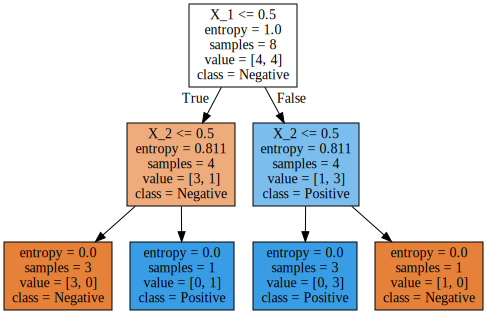

In [27]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Negative', 'Positive'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

Давайте посмотрим на то, что у нас получилось.

Так выглядит обученное нами дерево рещений. Из графика мы видим, как обученное нами дерево решений научилось разделять наши наблюдения на те, у которых y = 0 и те, у которых y = 0, используя данные про наши переменные X_1 и X_2.

Давайте быстренько посмотрим какие тут у нас ключевые слова.

Для удобства восприятия в код были добавлены лейблы `Poitive` и `Negative` для удобства восприятия. y=1 будет `Posiive`, а y=0 будет `Negative`.

В самом начале у нас верхний белый квадрат - было 4 наблюдения с классом 0, 4 наблюдения с классом 1. Энтропия при этом у нас равна единице, а вопрос, который мы задаём на этом шаге - "Правда ли что X_1 меньше либо равно 0.5?".

И если это правда, т.е. когда X_1 = 0, то мы видим, что у нас преобладает класс Negative. Мы попадаем в левую ветку - 3 наблюдения будут 0 и одно наблюдение - 1.

А вот в обратном случае, т.е. когда X_1 = 1 мы попадаем в правую ветку и у нас преобладает класс Positive. При этому 3 наблюдения будут 1 и одно - 0.

Поскольку в квадратах на втором уровне присутствует по 4 значения, относящихся к двум различным группам - дереву решений нужно классифицировать эти оставшиеся значения.

Следующий вопрос, который задаётся - "Правда ли что X_2 меньше либо равно 0.5?".

В этом случае все значения, которые меньше 0.5 попадают в класс Negative, а значения больше 0.5 - в класс Positive.

Это позволяет нам безошибочно разделить все наши точки на те, у которых y=0 или y=1.

Осталось только понять как дерево решений это сделало, что за энтропия тут появляется. Она максимальна в самом начале работы алгоритма. И равна нулю когда мы однозначно классифицировали наши наблюдения


Интересно как дерево определило в каком порядке нужно рассматривать фичи, ведь оно выбрало сначала наблюдения X_1 и только потом X_2. А что было бы, если бы фич было не две, а десять?

Оказывается дерево использует интересный математический аппарат, с которым интересно разобраться прежде чем приступать к решению других задач.

## Сыграем в игру - угадай кого из Биттлз загадал Толя Карпов

Для того чтобы получить информацию, приближающую нас к ответу нужно задавать вопросы, снижающие уровень неопределенности.

Например, вопрос: "Он человек?" совершенно не приближает нас к получению правильного ответа.

Вопрос, который отсечёт половину состава группы из рассмотрения: "А правда ли, что биттл, которго ты загадал, играет на ударных?". Ответ "да" оставляет в рассмотрении только Ринго и Пола.

Аналогично и в нашем дереве решений. Вопрос "а правда ли наша переменная больше -5?" никак не приблизит нас к решению задачи.